In [70]:
# Librerías
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,r2_score)
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
# Definimos una función para graficar resultados de las regresiones lineales
def draw_lm_results(y_test_p, x_test_p, model):
    ref_p = np.linspace(min(y_test_p),max(y_test_p))
    y_predict_p = model.predict(x_test_p)
    fig = plt.figure(figsize=(10,8))
    plt.scatter(y_test_p,y_predict_p)
    plt.plot(ref_p,ref_p,'k--')
    plt.axis('square')
    plt.xlabel('y real'),plt.ylabel('y predict')
    mse_p = mean_squared_error(y_test_p,y_predict_p, squared=False)
    r2_p = r2_score(y_test_p,y_predict_p)
    plt.title(f"Linear regression (original), RMSE={mse_p:.10f}, R^2={r2_p:.10f}")
    plt.grid()
    plt.show()

In [83]:
x_column_names = {"Sector_score","PARA_A","Score_A",
                "Risk_A","PARA_B","Score_B","Risk_B","TOTAL",
                "numbers","Score_B.1","Risk_C","Money_Value",
                "Score_MV","Risk_D","District_Loss","PROB",
                "RiSk_E","History","Prob","Risk_F","Score",
                "Inherent_Risk","CONTROL_RISK","Detection_Risk"}
y_column_name = {"Audit_Risk"}
df_train = pd.read_csv("Audit_train.csv", index_col=0)
#df_train_x = [x_column_names]# Idx 0-200
#df_train_y = pd.read_csv("Audit_train.csv", index_col=0)[y_column_name]
df_test_x = pd.read_csv("Audit_test.csv", index_col=0)[x_column_names] # Idx 201-299 (se eliminaron manual 200 y 300)
df_test_y = pd.read_csv("Audit_test.csv", index_col=0)[y_column_name]
df_unknown_x = pd.read_csv("Audit_unknown.csv", index_col=0)[x_column_names] # 300-350

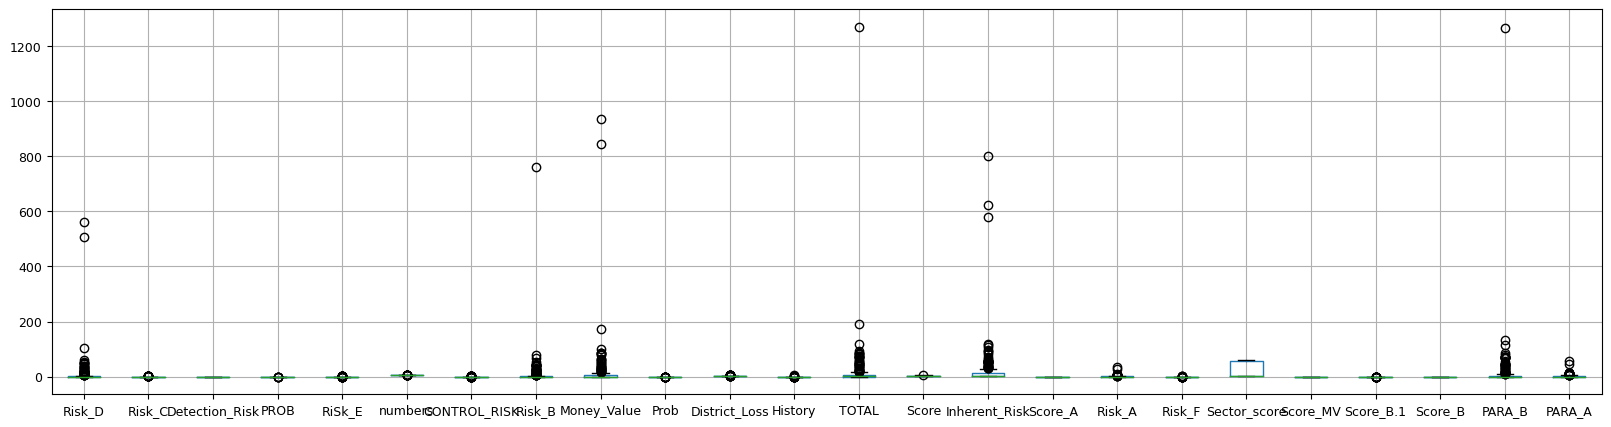

In [84]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5))
plt.show()

In [90]:
# Se obtienen todas las outliers desde boxplot, luego se itera en el dataframe original para eliminarlas. 
outliers = [flier.get_ydata() for flier in boxplot_dict["fliers"]]

# Crear una lista de índices de filas que contienen outliers en cualquier columna
outlier_rows = []
for col_idx, outlier_data in enumerate(outliers):
    df_train = df_train[~df_train.iloc[:, col_idx].isin(outlier_data)]

# df_train contiene el DataFrame original sin las filas que contenían outliers en cualquier columna
df_train = df_train.reset_index(drop=True)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    180 non-null    float64
 1   PARA_A          180 non-null    float64
 2   Score_A         180 non-null    float64
 3   Risk_A          180 non-null    float64
 4   PARA_B          180 non-null    float64
 5   Score_B         180 non-null    float64
 6   Risk_B          180 non-null    float64
 7   TOTAL           180 non-null    float64
 8   numbers         180 non-null    float64
 9   Score_B.1       180 non-null    float64
 10  Risk_C          180 non-null    float64
 11  Money_Value     180 non-null    float64
 12  Score_MV        180 non-null    float64
 13  Risk_D          180 non-null    float64
 14  District_Loss   180 non-null    int64  
 15  PROB            180 non-null    float64
 16  RiSk_E          180 non-null    float64
 17  History         180 non-null    int

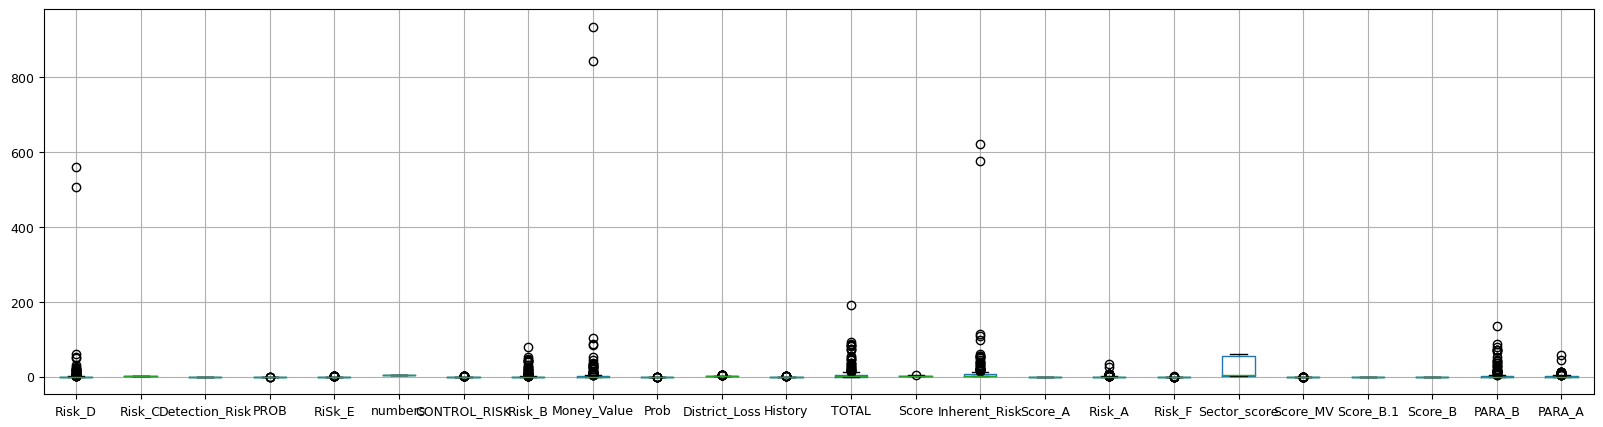

In [91]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5))
plt.show()

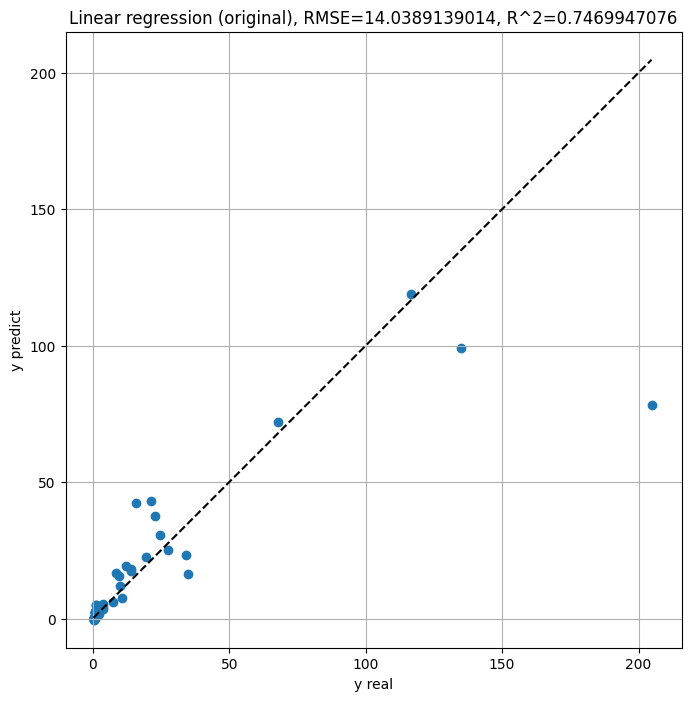

In [92]:
linreg_train = LinearRegression()
linreg_train.fit(df_train[x_column_names],np.array(df_train[y_column_name]))
draw_lm_results(np.array(df_test_y), df_test_x, linreg_train)